## Computing neighbouring contribution function 

In [1]:
# 1D case 
# params = x
# xgrid: xv 

In [2]:
import jax.numpy as jnp
import numpy as np
from jax import jit
from jax import vmap

In [3]:
@jit
def conti(i,x,xv):
    """contribution function for index i.  
    
    Args:
        i: index 
        x: x value
        xv: x grid
            
    Returns:
        contribution for i
        
    """
    indarr=jnp.arange(len(xv))
    pos = jnp.interp(x,xv,indarr)
    index = (pos).astype(int)
    cont = pos-index
    f=jnp.where(index==i,1.0-cont,0.0)
    g=jnp.where(index+1==i,cont,0.0)
    return f+g

In [4]:
def nc1D(x,xv):
    """neighbouring contribution array on a line.
    
    Args:
        x: x value
        xv: x grid
            
    Returns:
        neighbouring contribution for i
        
    """
    indarr=jnp.arange(len(xv))
    vcl=vmap(conti,(0,None,None),0)
    return vcl(indarr,x,xv)

In [5]:
xv=jnp.linspace(0,1,11) #grid
print(nc1D(0.23,xv))

[0.         0.         0.70000005 0.29999995 0.         0.
 0.         0.         0.         0.         0.        ]


In [6]:
from jax import grad

In [7]:
def gnc1D(x,xv):
    """gradiend of neighbouring contribution array on a line by x.
    
    Args:
        x: x value
        xv: x grid
            
    Returns:
        neighbouring contribution for i
        
    """
    indarr=jnp.arange(len(xv))
    vcl=vmap(grad(conti,argnums=1),(0,None,None),0)
    return vcl(indarr,x,xv)

In [8]:
print(gnc1D(0.23,xv))

[ 0.        0.       -9.999999  9.999999  0.        0.        0.
  0.        0.        0.        0.      ]


In [9]:
xv=jnp.linspace(0,1,11) #grid
a=[]
ga=[]
xin=jnp.linspace(0,1,101)
for i,x in enumerate(xin):
    a.append(nc1D(x,xv))
    ga.append(gnc1D(x,xv))

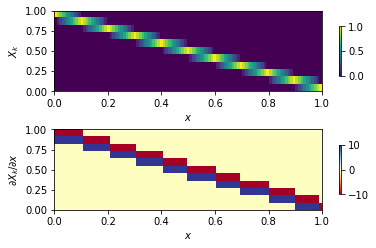

In [11]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(211)
c=plt.imshow(jnp.array(a).T,extent=[0,1,0,1],aspect=0.15)
plt.colorbar(c,shrink=0.5)
plt.xlabel("$x$")
plt.ylabel("$X_k$")
ax.set_aspect(0.3/ax.get_data_ratio())
ax=fig.add_subplot(212)
c=plt.imshow(jnp.array(ga).T,extent=[0,1,0,1],aspect=0.15,cmap="RdYlBu")
plt.colorbar(c,shrink=0.5)
ax.set_aspect(0.3/ax.get_data_ratio())
plt.xlabel("$x$")
plt.ylabel("$\partial X_k/\partial x$")
plt.savefig("ncf.pdf", bbox_inches="tight", pad_inches=0.0)
plt.show()

In [12]:
#2D case
# x, y

In [13]:
def nc2D(x,y,xv,yv):
    """2D neighbouring contribution.
    
    Args:
        x: x value
        y: x value
        xv: x grid
        yv: x grid
            
    Returns:
        neighbouring contribution 
        
    """
    indarrx=jnp.arange(len(xv))
    indarry=jnp.arange(len(yv))
    vcl=vmap(conti,(0,None,None),0)
    fx=vcl(indarrx,x,xv)
    fy=vcl(indarry,y,yv)
    return fx[:,None]*fy[None,:]

In [14]:
xv=jnp.linspace(0,1,11) #grid
yv=jnp.linspace(0,1,15) #grid

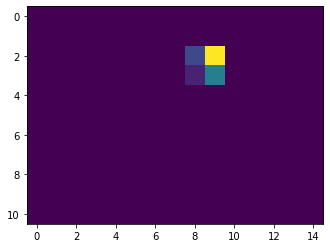

In [15]:
plt.imshow(nc2D(0.23,0.63,xv,yv))